### 이미지 합성하기
- 비트연산

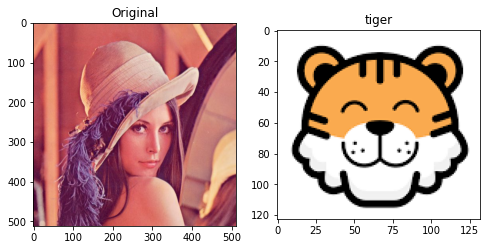

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./image/tiger.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,5))

plt.subplot(1,2,1) # plt에서 여러개 출력하기 / (1,2,1) : row,columns,index
plt.title('Original')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('tiger')
plt.imshow(img2)

In [6]:
# tiger에 해당하는 동일한 크기의 원본 이미지 잘라내기
rows, cols, channels = img2.shape
img2.shape

(123, 132, 3)

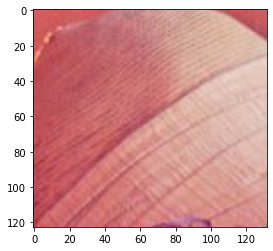

In [7]:
roi = img[50:rows+50, 150:cols+150]
plt.imshow(roi)

- cv2.bitwise_not(mask)

In [31]:
# 원본 이미지의 마스크 패턴 만들기
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask_b = cv2.threshold(img2gray, 200,255,cv2.THRESH_BINARY)

mask_b_inv = cv2.bitwise_not(mask_b) # 흰검 반전

cv2.imshow('2',mask_b)
cv2.imshow('1',img2gray)
cv2.imshow('3',mask_b_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.bitwise_and(src1, src2, mask = ) : mask의 값이 아닌 부분만 src1과 src2를 AND연산
    - mask는 흑백 이미지여야 함
    - mask 값이 0인 부분(검정)은 연산되지 않고 검정색 그대로 놓여진다.

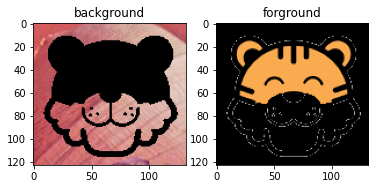

In [14]:
img_bg = cv2.bitwise_and(roi,roi, mask = mask_b) 
# mask의 검정 부분빼고 roi가 됨
img_fg = cv2.bitwise_and(img2,img2, mask = mask_b_inv)

plt.subplot(1,2,1)
plt.title('background')
plt.imshow(img_bg)
plt.subplot(1,2,2)
plt.title('forground')
plt.imshow(img_fg)
plt.show()

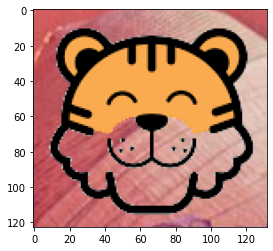

In [15]:
bg_fg = cv2.add(img_bg, img_fg)
plt.imshow(bg_fg)

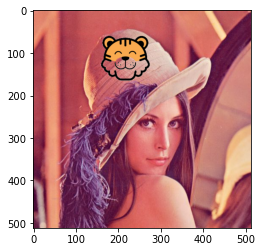

In [16]:
# 기존 original 이미지에 합성한 이미지 붙이기
img[50:rows+50, 150:cols+150] = bg_fg
plt.imshow(img)

### 실습

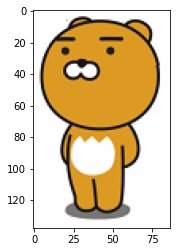

In [26]:
img = cv2.imread('./image/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./image/ryan.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [23]:
rows, cols, channels = img2.shape
img2.shape

(138, 87, 3)

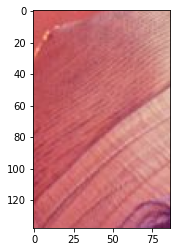

In [24]:
roi = img[50:rows+50, 150:cols+150]

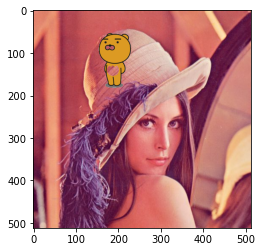

In [32]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask_b = cv2.threshold(img2gray, 200,255,cv2.THRESH_BINARY)

mask_b_inv = cv2.bitwise_not(mask_b) 

img_bg = cv2.bitwise_and(roi,roi, mask = mask_b) 
img_fg = cv2.bitwise_and(img2,img2, mask = mask_b_inv)

bg_fg = cv2.add(img_bg, img_fg)
img[50:rows+50, 150:cols+150] = bg_fg
plt.imshow(img)